<Figure size 1080x2160 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

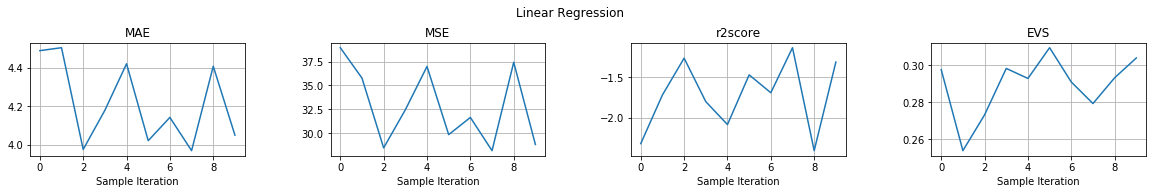

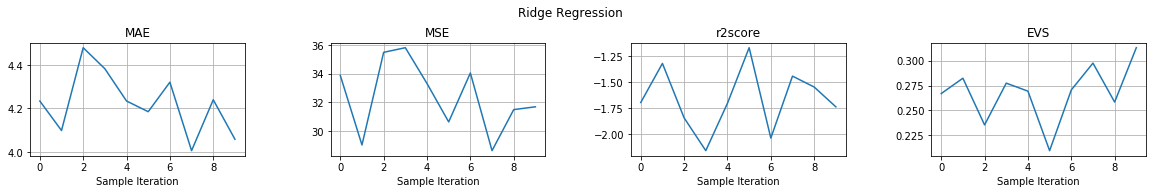

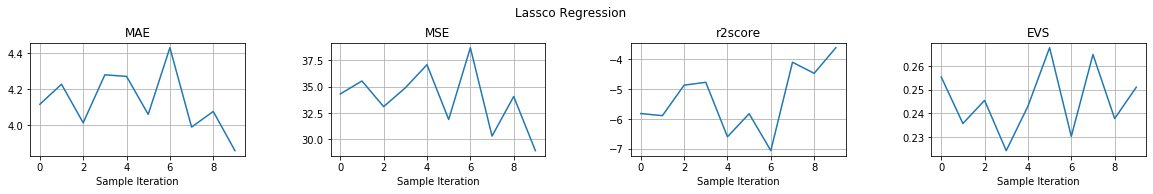

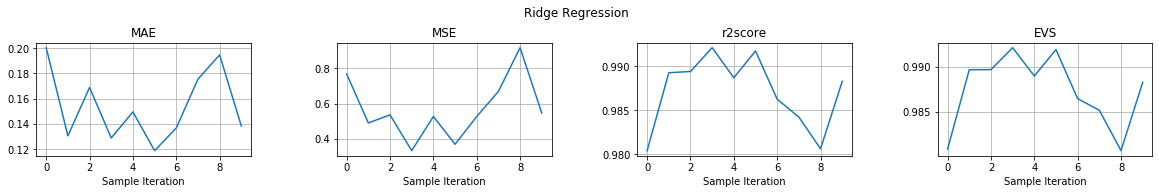

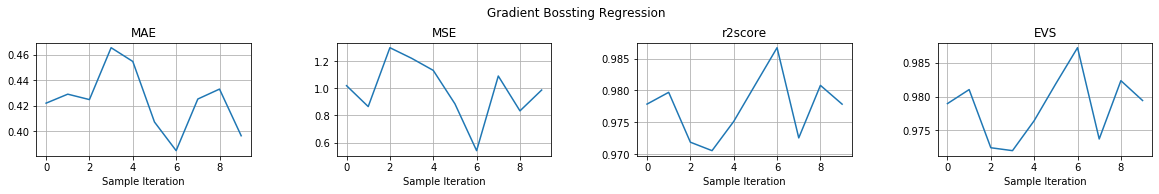

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("data.csv")

X_vals = df.iloc[:,0:5]
y_vals = df.iloc[:,-1]

# Normalization
scaler = StandardScaler()
X_vals = scaler.fit_transform(X_vals)

def Addsubplots(fig,index,title,plotValues):
    ax = fig.add_subplot(2, 4, index)
    ax.set_title(title)
    ax.set_xlabel("Sample Iteration")
    ax.plot(range(10),plotValues)
    ax.grid()

from random import seed
from random import shuffle

fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i =0

# lin_reg = RandomForestRegressor(n_estimators=100,random_state=0)
lin_reg = LinearRegression()
scores = []

models =[]

models.append(("Linear Regression",LinearRegression()))
models.append(("Ridge Regression",Ridge()))
models.append(("Lassco Regression",Lasso()))
models.append(("Ridge Regression",RandomForestRegressor(n_estimators=100,random_state=0)))
models.append(("Gradient Bossting Regression",GradientBoostingRegressor()))

i = 0
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for name,model in models:
    mae = []
    mse = []
    r2scores = []
    rmse = []
    evs = []
        
    for j in range(10):    
        # seed random number generato
        # prepare a sequence
        sequence = [i for i in range(1440)]
        #print(sequence)
        # randomly shuffle the sequence
        shuffle(sequence)
        train_index = sequence[0:1000]
        test_index = sequence[1000:1440]

        X_train = X_vals[train_index]
        X_test = X_vals[test_index]
        y_train = y_vals[train_index]
        y_test = y_vals[test_index]

        
        model_train = model.fit(X_train, y_train)
        y_pred = model_train.predict(X_test)
        
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2scores.append(r2_score(y_pred,y_test))
        evs.append(explained_variance_score(y_test,y_pred))

    fig = plt.figure(figsize=(20,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    fig.suptitle(name)

    Addsubplots(fig,1,"MAE",mae)
    
    Addsubplots(fig,2,"MSE",mse)
    
    Addsubplots(fig,3,"r2score",r2scores)
   
    Addsubplots(fig,4,"EVS",evs)